In [1]:
import pandas as pd
from prophet import Prophet


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
m = Prophet()
m.fit(df)

17:15:28 - cmdstanpy - INFO - Chain [1] start processing
17:15:29 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206106,7.474690,8.911656
3266,2017-01-16,8.531091,7.789764,9.217712
3267,2017-01-17,8.318507,7.576034,9.022809
3268,2017-01-18,8.151160,7.422300,8.909547
3269,2017-01-19,8.163022,7.394880,8.882163


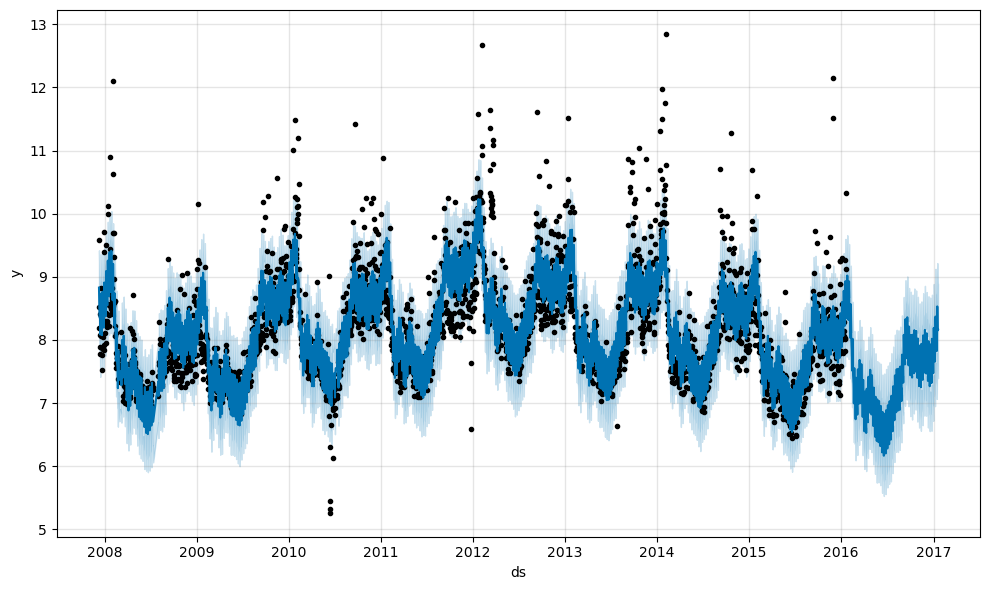

In [6]:
fig1 = m.plot(forecast)


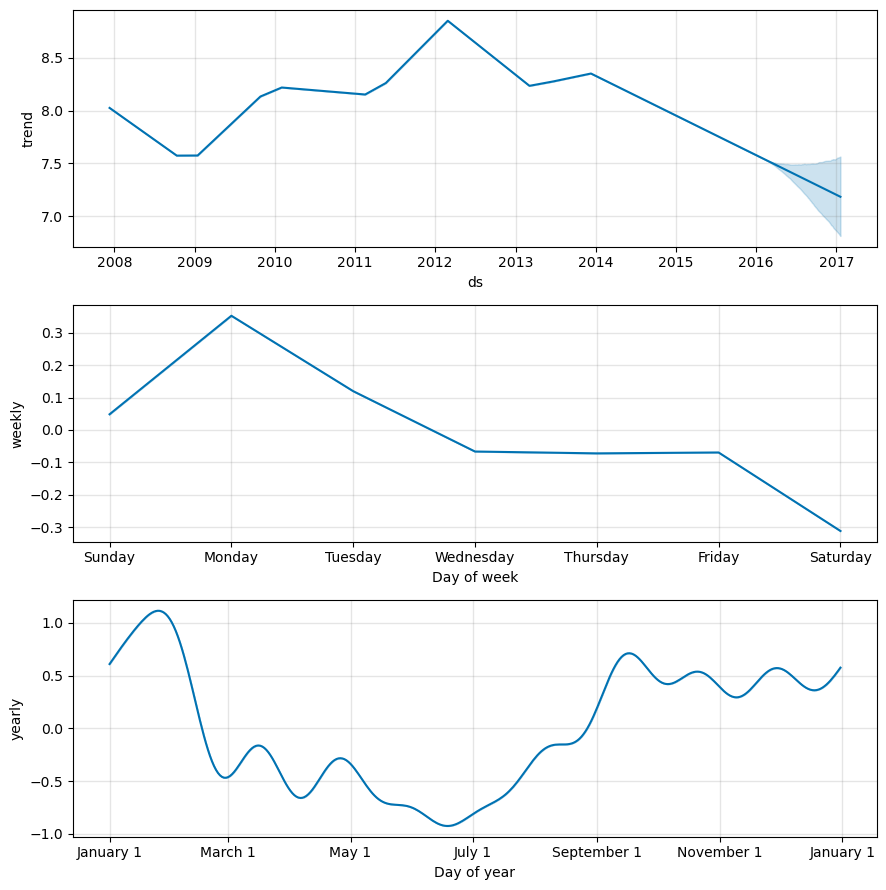

In [7]:
fig2 = m.plot_components(forecast)


In [8]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [9]:
plot_components_plotly(m, forecast)


18:22:20 - cmdstanpy - INFO - Chain [1] start processing
18:22:21 - cmdstanpy - INFO - Chain [1] done processing


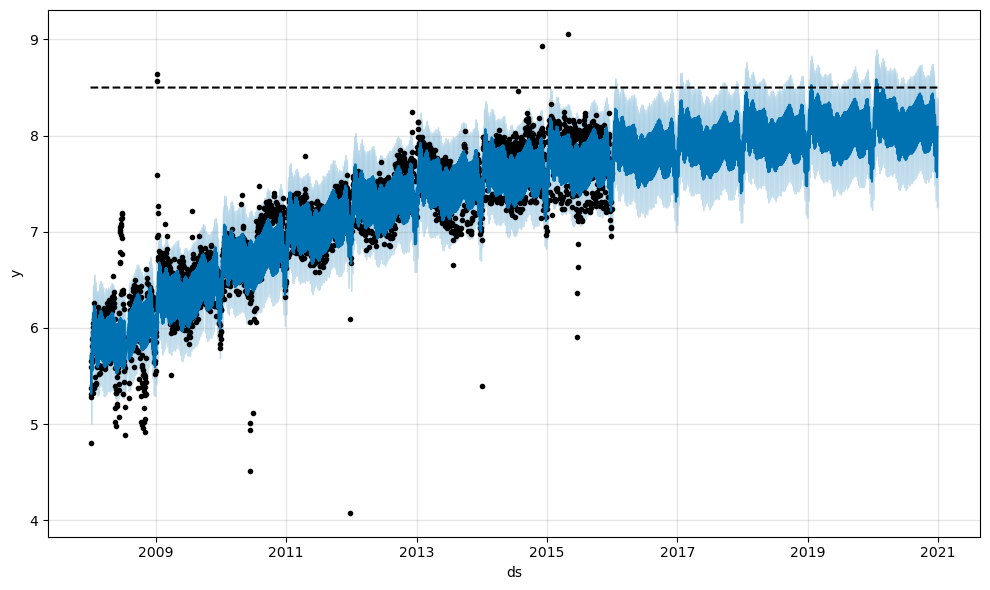

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv')
df['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

In [11]:
df

,ds,y,cap
0,2008-01-30,5.976351,8.5
1,2008-01-16,6.049733,8.5
2,2008-01-17,6.011267,8.5
3,2008-01-14,5.953243,8.5
4,2008-01-15,5.910797,8.5
...,...,...,...
2858,2015-12-11,7.834788,8.5
2859,2015-12-12,7.360104,8.5
2860,2015-12-13,7.479864,8.5
2861,2015-12-18,7.765145,8.5
